In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

Coef : [54.25650952]
Intercept : 0.496111071129393


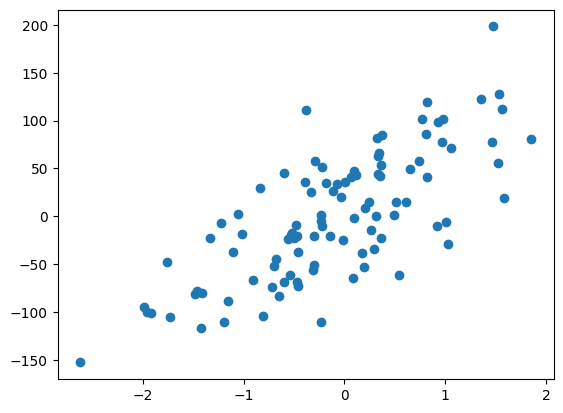

In [4]:
X , y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=50, random_state=42,n_targets=1)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(f'Coef : {lr.coef_}')
print(f'Intercept : {lr.intercept_}')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.292e+04, tolerance: 3.384e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

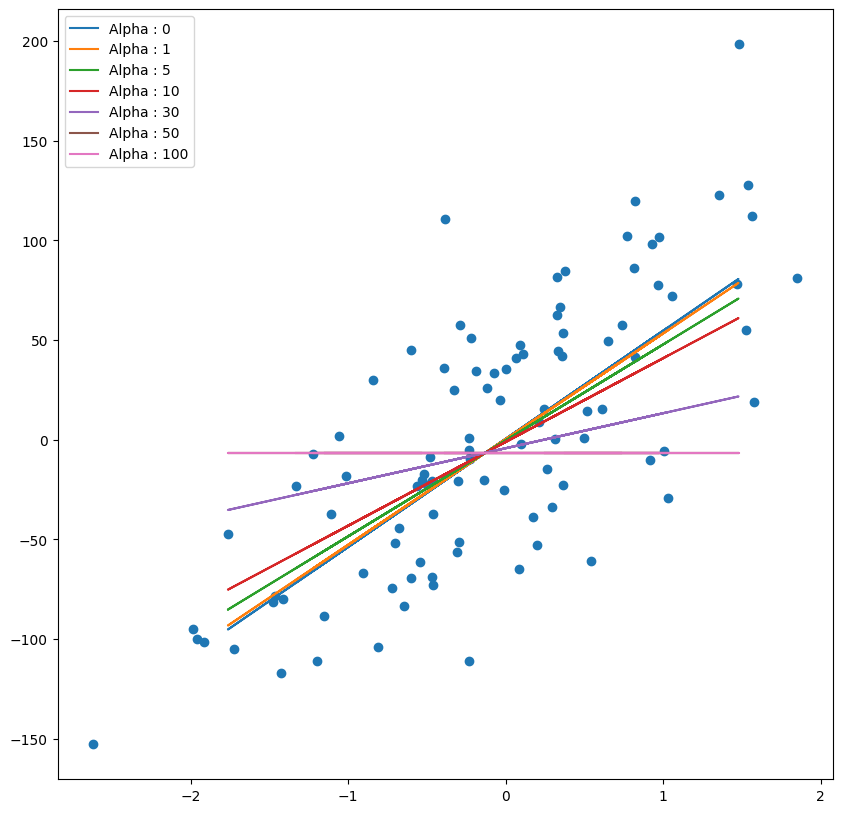

In [6]:
alphas = [0,1,5,10,30,50,100]
plt.figure(figsize=(10,10))
plt.scatter(X,y)
for i in alphas:
  L = Lasso(alpha=i)
  L.fit(X_train,y_train)
  y_pred = L.predict(X_test)
  plt.plot(X_test,y_pred,label=f'Alpha : {i}')
plt.legend()
plt.show()

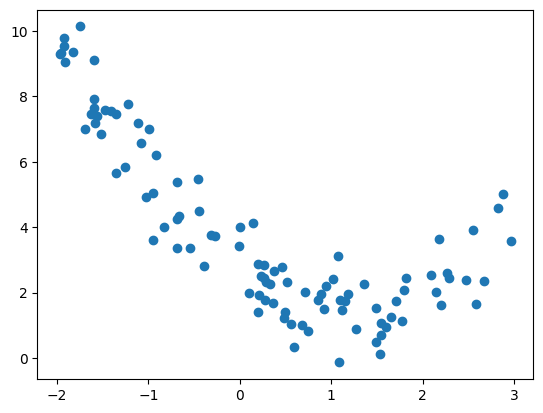

In [7]:
m = 100
x1 = 5 * np.random.rand(m,1)-2
x2 = 0.7*x1**2 - 2*x1 + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.194e+01, tolerance: 7.064e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

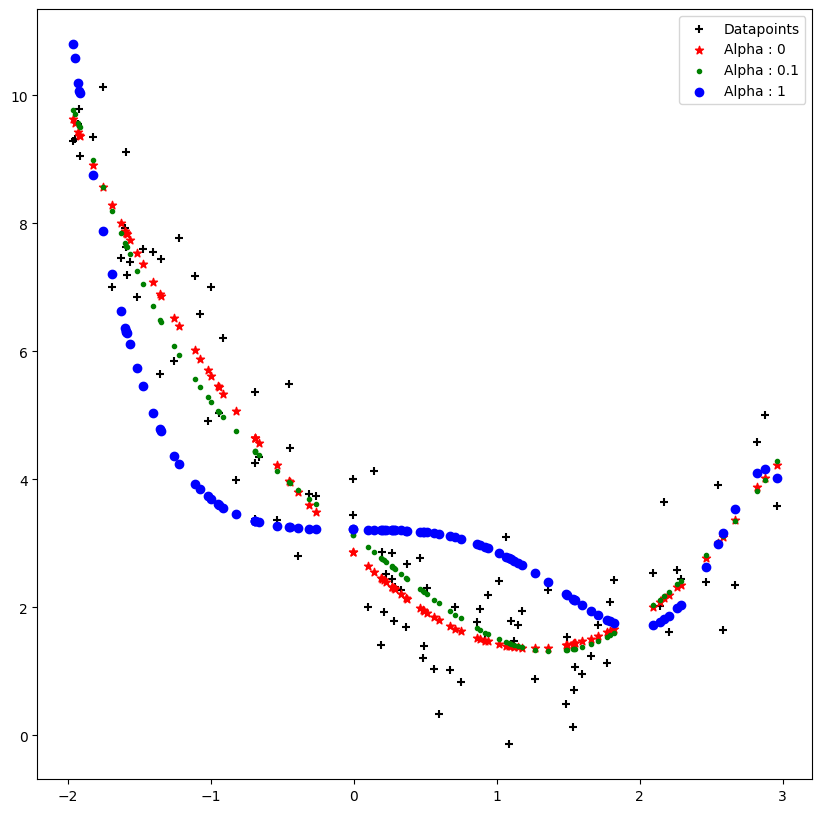

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1,x2,alpha):
  model = Pipeline([
      ("poly_feats",PolynomialFeatures(degree=16)),
      ('lasso',Lasso(alpha=alpha))
  ])

  model.fit(x1,x2)
  return model.predict(x1)


alpha = [0,0.1,1]
cs = ["r","g","b"]
marker = ["*",".","o"]
num = 0

plt.figure(figsize=(10,10))
plt.scatter(x1,x2,label="Datapoints",marker="+",c="black")

for alpha , c in zip(alpha,cs):
  y_pred = get_preds_lasso(x1,x2,alpha)
  plt.scatter(x1,y_pred,c=c,label=f"Alpha : {alpha}",marker=marker[num])
  num += 1
plt.legend()
plt.show()

